# Implementation of Vanilla GANs model
In the first lab session, the discriminator (D) and generator (G) are based on MLP. You are supposed to write code for D and G and have to save the trained parameters. The rest of the code is provided to you. After successful training, you will have implemented vanilla GAN on your own.


**Steps to be followed**


1.   Write a Discriminator Class using your own discriminator that can classify the Real data and data generated by the generator. (Should be a simple CNN for binary classification)
2.   Write a Generator class here  Instructions: Write your own code for Generator multi-layer perceptron or CNN that can be fed with any latent vector or noise or seed. That can generate a mnist-like image.
3. Save the trained parameters of the generator and discriminator.

In [1]:
!pip install torch torchvision

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image

In [4]:
import numpy as np
import datetime
import os, sys

In [5]:
from matplotlib.pyplot import imshow, imsave
%matplotlib inline

In [6]:
MODEL_NAME = 'VanillaGAN'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
def get_sample_image(G, n_noise):
    """
        save sample 100 images
    """
    z = torch.randn(100, n_noise).to(DEVICE)
    y_hat = G(z).view(100, 28, 28) # (100, 28, 28)
    result = y_hat.cpu().data.numpy()
    img = np.zeros([280, 280])
    for j in range(10):
        img[j*28:(j+1)*28] = np.concatenate([x for x in result[j*10:(j+1)*10]], axis=-1)
    return img


**Instructions:** Use your own discriminator can classify the Real data and data generated by the generator. (Should be a simple CNN for binary classification)


In [8]:
class Discriminator(nn.Module):
    """
        Simple Discriminator w/ MLP
    """
    def __init__(self, input_size = 784, num_classes = 1):
        super(Discriminator, self).__init__()
        # Write your code here
        self.conv = nn.Sequential(
            nn.Linear(input_size,1024),
            nn.LeakyReLU(0.2),
            # nn.Dropout(0.3),
            nn.Linear(1024,512),
            nn.LeakyReLU(0.2),
            # nn.Dropout(0.3),
            nn.Linear(512,256),
            nn.LeakyReLU(0.2),
            # nn.Dropout(0.3)
        )

        self.fc = nn.Sequential(
            nn.Linear(256,1),
            nn.Sigmoid()
        )

    def forward(self, x):
      y_ = x.view(x.size(0), -1)  # Flattening the input
      y_ = self.conv(y_)
      y_ = self.fc(y_)
      return y_

**Instructions:** Write your own code for Generator multi-layer perceptron or CNN that can be fed with any latent vector or noise.

In [9]:
class Generator(nn.Module):
    """
        Simple Generator w/ MLP
    """
    def __init__(self, input_size = 100, num_classes = 784):
        super(Generator, self).__init__()

          # Write your code here

        self.layer = nn.Sequential(
            nn.Linear(input_size,256),
            nn.LeakyReLU(0.2),
            nn.Linear(256,512),
            nn.LeakyReLU(0.2),
            nn.Linear(512,1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024,1024),
            nn.LeakyReLU(0.2)
        )

        self.fc = nn.Sequential(
            nn.Linear(1024,num_classes),
            nn.Tanh()
        )


    def forward(self, x):
        y_ = self.layer(x)
        y_ = self.fc(y_)
        y_ = y_.view(x.size(0), 1, 28, 28)
        return y_

In [10]:
n_noise = 100

In [11]:
D = Discriminator().to(DEVICE)
G = Generator(n_noise).to(DEVICE)

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean = [0.5],
                                std = [0.5])]
)

In [13]:
mnist = datasets.MNIST(root='../data/', train = True, transform = transform, download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 95049967.52it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 6520033.04it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23794896.19it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7084614.64it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [14]:
batch_size = 64

In [15]:
data_loader = DataLoader(dataset = mnist, batch_size = batch_size, shuffle = True, drop_last = True)

In [16]:
criterion = nn.BCELoss()
D_opt = torch.optim.Adam(D.parameters(), lr = 0.0002, betas = (0.5, 0.999))
G_opt = torch.optim.Adam(G.parameters(), lr = 0.0002, betas = (0.5, 0.999))

In [17]:
max_epoch = 50
step = 0
n_critic = 1

In [18]:
D_labels = torch.ones(batch_size, 1).to(DEVICE) # Discriminator Label to real
D_fakes = torch.zeros(batch_size, 1).to(DEVICE) # Discriminator Label to fake

In [19]:
if not os.path.exists('samples'):
    os.makedirs('samples')

Epoch: 0/50, Step: 500, D_Loss: 0.47496363520622253, G_Loss: 2.2663540840148926
Epoch: 0/50, Step: 1000, D_Loss: 0.5419625043869019, G_Loss: 3.1019673347473145
Epoch: 1/50, Step: 1500, D_Loss: 0.7885025143623352, G_Loss: 2.726715087890625
Epoch: 1/50, Step: 2000, D_Loss: 0.6898220777511597, G_Loss: 1.873347520828247
Epoch: 2/50, Step: 2500, D_Loss: 0.7722793817520142, G_Loss: 3.6275315284729004
Epoch: 2/50, Step: 3000, D_Loss: 0.4176536798477173, G_Loss: 2.1073765754699707
Epoch: 3/50, Step: 3500, D_Loss: 0.4083429276943207, G_Loss: 2.379812002182007
Epoch: 3/50, Step: 4000, D_Loss: 0.19716642796993256, G_Loss: 3.253070831298828
Epoch: 4/50, Step: 4500, D_Loss: 0.5301512479782104, G_Loss: 2.568183422088623
Epoch: 4/50, Step: 5000, D_Loss: 0.6901946067810059, G_Loss: 4.131580352783203
Epoch: 5/50, Step: 5500, D_Loss: 0.46644702553749084, G_Loss: 1.8815102577209473
Epoch: 5/50, Step: 6000, D_Loss: 0.8074579238891602, G_Loss: 2.0089974403381348
Epoch: 6/50, Step: 6500, D_Loss: 0.875974833

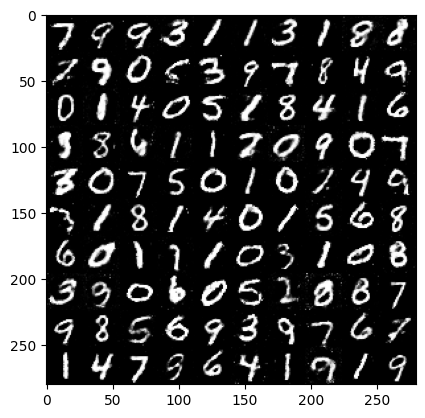

In [21]:
for epoch in range(max_epoch):
    for idx, (images, _) in enumerate(data_loader):
        # Training Discriminator
        x = images.to(DEVICE)
        x_outputs = D(x)
        D_x_loss = criterion(x_outputs, D_labels)

        z = torch.randn(batch_size, n_noise).to(DEVICE)
        z_outputs = D(G(z))
        D_z_loss = criterion(z_outputs, D_fakes)
        D_loss = D_x_loss + D_z_loss

        D.zero_grad()
        D_loss.backward()
        D_opt.step()

        if step % n_critic == 0:
            # Training Generator
            z = torch.randn(batch_size, n_noise).to(DEVICE)
            z_outputs = D(G(z))
            G_loss = criterion(z_outputs, D_labels)

            G.zero_grad()
            G_loss.backward()
            G_opt.step()

        if step % 500 == 0:
            print('Epoch: {}/{}, Step: {}, D_Loss: {}, G_Loss: {}'.format(epoch, max_epoch, step, D_loss.item(), G_loss.item()))

        if step % 1000 == 0:
            G.eval()
            img = get_sample_image(G, n_noise)
            imshow(get_sample_image(G, n_noise), cmap = 'gray')
            imsave('samples/{}_step{}.jpg'.format(MODEL_NAME, str(step).zfill(3)), img, cmap='gray')
            G.train()
        step += 1

## Visualize Sample

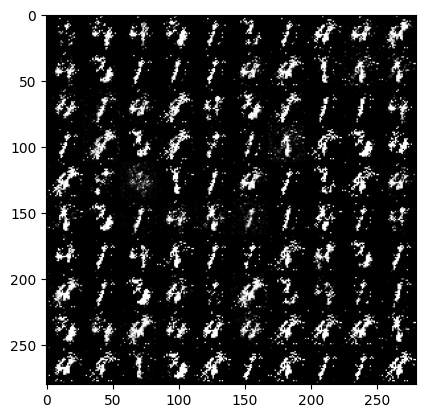

In [163]:
imshow(get_sample_image(G, n_noise), cmap = 'gray')

**Instructions:** Write a code to save your trained parameters of generator and discriminator here

# **This code should be in epoch loop to save all the params at the end of every epoch**

In [ ]:
# Saving Model Configurations and Paramaters

  # Write your code here

  # Save models and configuration at the end of each epoch
    if epoch % save_interval == 0:
        # Save the generator (G) and discriminator (D) state dictionaries
        torch.save(G.state_dict(), 'generator_checkpoint_epoch{}.pth'.format(epoch))
        torch.save(D.state_dict(), 'discriminator_checkpoint_epoch{}.pth'.format(epoch))

        # Save the model configuration (optional)
        model_config = {
            'n_noise': n_noise,
            'batch_size': batch_size,
            # optional parameters.......
        }
        with open('model_config.json', 'w') as f:
            json.dump(model_config, f)

